In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fna.tasks.symbolic import SymbolicSequencer, NonAdjacentDependencies, NaturalLanguage
from fna.tasks.symbolic.embeddings import VectorEmbeddings, DynamicEmbeddings

** mayavi.mlab ** package is not installed. To have functions using mayavi.mlab please install the package.


Let's first create a few different sequencers to use as an example. 

In [2]:
n_strings = 1000
seq_length = 10000

In [3]:
random_sequencer = SymbolicSequencer(label='random', set_size=10)
random_sequence = random_sequencer.generate_random_sequence(T=seq_length)

nad_sequencer = NonAdjacentDependencies(vocabulary_size=5, filler_variability=1, dependency_length=4)
nad_sequencer.generate_stringset(set_length=n_strings, generator=False, violations=None)
nad_sequence = nad_sequencer.generate_sequence()

brown_corp = NaturalLanguage(label="brown", text_data=None, character_level=False)
brown_seq = brown_corp.sequence

[sequences.py:91 - INFO] Generating symbolic sequencer
[sequences.py:144 - INFO] Generating a random sequence of length 10000, from a set of 10 symbols
[sequences.py:91 - INFO] Generating symbolic sequencer
[non_adjacent_dep.py:73 - INFO] Generating 1000 strings, according to nAD rules...
[language.py:44 - INFO] Loading brown corpus from nltk
[sequences.py:91 - INFO] Generating symbolic sequencer
[language.py:83 - INFO] ***************************************************************************
[language.py:85 - INFO] Natural Language: brown
[language.py:86 - INFO] Number of strings: 0
[language.py:87 - INFO] Vocabulary size: 56057
[language.py:88 - INFO] Sequence length: 1161192
[language.py:89 - INFO] Most common: [('the', 62713), (',', 58334), ('.', 49346), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881), ('in', 19536), ('that', 10237), ('is', 10011)]


Choose one of the sequencer objects to use in the rest of the notebook.

In [4]:
sequencer = random_sequencer
sequence = random_sequence

sample_sequences = sequencer.draw_subsequences(n_subseq=1, seq=sequence, length_range=(10, 15)) # to plot
long_sample_sequence = sequencer.draw_subsequences(n_subseq=1, seq=sequence, length_range=(1000, 2000))

# **3. Discrete symbolic embeddings - tokens to vectors** <a id='section3'></a>

Each Embedding object generates and maintains a `stimulus_set` dictionary with `{token: embedding}` or `{token: [embedding1, ..., ]}`

## 3.1. `VectorEmbeddings` - discrete inputs <a id='section3.1'></a>

[embeddings.py:213 - INFO] Generating stimulus sequence: 11 symbols


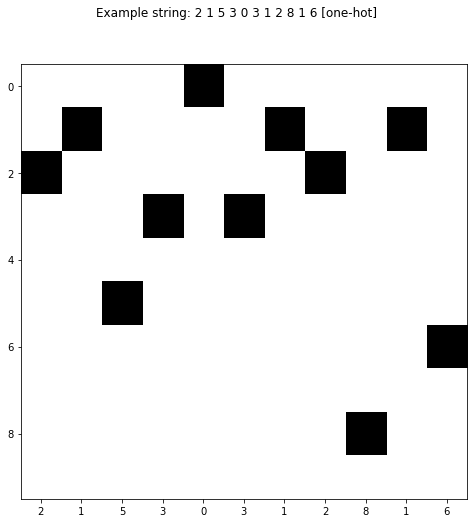

[embeddings.py:213 - INFO] Generating stimulus sequence: 11 symbols


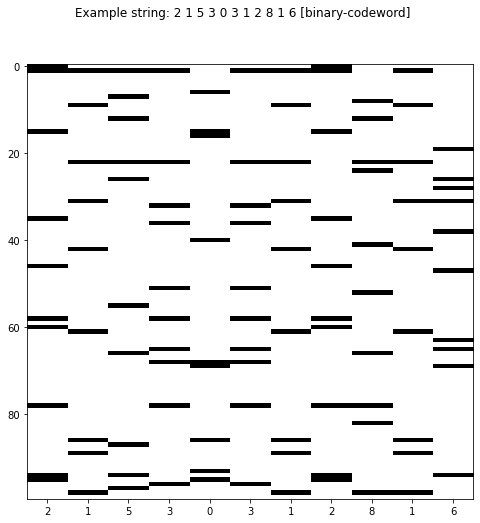

[embeddings.py:213 - INFO] Generating stimulus sequence: 11 symbols


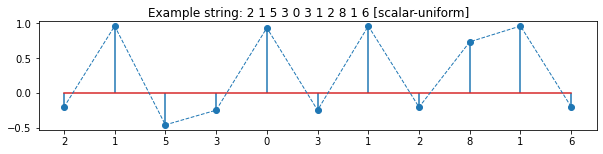

[embeddings.py:213 - INFO] Generating stimulus sequence: 11 symbols


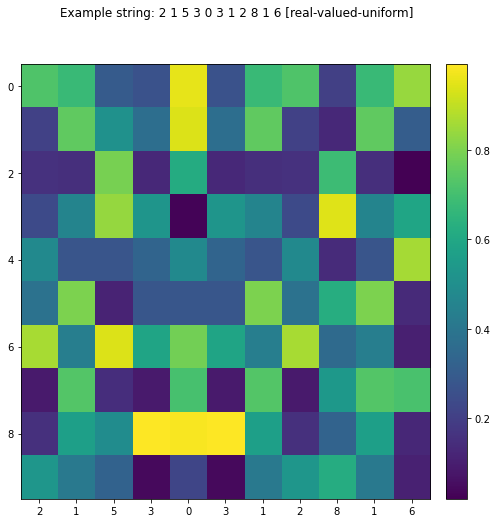

[embeddings.py:213 - INFO] Generating stimulus sequence: 11 symbols


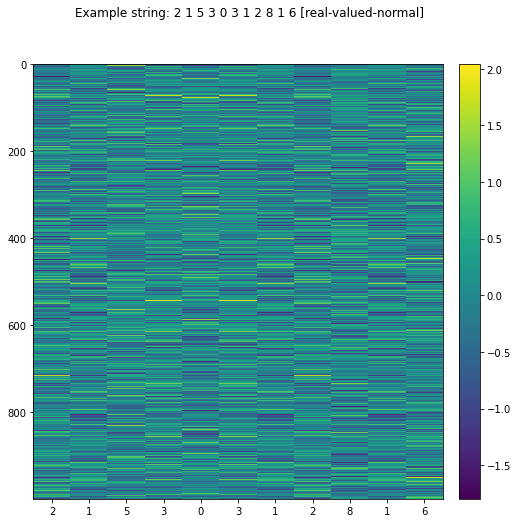

In [5]:
# vector / scalar embeddings
one_hot = VectorEmbeddings(vocabulary=sequencer.tokens).one_hot()

binary_codeword = VectorEmbeddings(vocabulary=sequencer.tokens).binary_codeword(dim=100, density=0.1)

scalar = VectorEmbeddings(vocabulary=sequencer.tokens).real_valued(dim=1, distribution=np.random.uniform, parameters={
    'low': -1., 'high': 1.})

random_vector1 = VectorEmbeddings(vocabulary=sequencer.tokens).real_valued(dim=None, distribution=np.random.uniform, parameters={
     'low': 0., 'high': 1.})

random_vector2 = VectorEmbeddings(vocabulary=sequencer.tokens).real_valued(dim=1000, distribution=np.random.normal,
                                                                    parameters={'loc': 0., 'scale': 0.5})
# plot example
emb = [one_hot, binary_codeword, scalar, random_vector1, random_vector2] 
for seq in sample_sequences:
    for idx, enc in enumerate(emb):
        enc.plot_sample(seq, save=False)

## 3.2. `Word2VecEmbedding`

## 3.3. Embedding complexity and input space geometry - discrete input spaces

We can visualize the (discrete) input space either directly plotting the input values / vectors (1, 2 or 3D cases) or by projecting the input embeddings to a low-dimensional space (if adequate). Additionally, this projection can be done by different dimensionality reduction methods:
```python
metrics = ['PCA', 'FA', 'LLE', 'IsoMap', 'Spectral', 'MDS', 't-SNE']
```

[embeddings.py:213 - INFO] Generating stimulus sequence: 1919 symbols
[metrics.py:1529 - INFO] Dimensionality reduction with MultiDimensional Scaling
[metrics.py:1534 - INFO] Elapsed time: 27.29166889190674 s
[embeddings.py:213 - INFO] Generating stimulus sequence: 1919 symbols
[metrics.py:1529 - INFO] Dimensionality reduction with MultiDimensional Scaling
[metrics.py:1534 - INFO] Elapsed time: 45.18405771255493 s
[embeddings.py:213 - INFO] Generating stimulus sequence: 1919 symbols
[embeddings.py:213 - INFO] Generating stimulus sequence: 1919 symbols
[metrics.py:1529 - INFO] Dimensionality reduction with MultiDimensional Scaling
[metrics.py:1534 - INFO] Elapsed time: 21.004703521728516 s
[embeddings.py:213 - INFO] Generating stimulus sequence: 1919 symbols
[metrics.py:1529 - INFO] Dimensionality reduction with MultiDimensional Scaling
[metrics.py:1534 - INFO] Elapsed time: 46.29827332496643 s


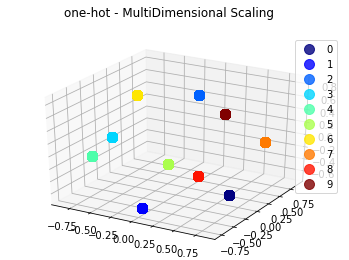

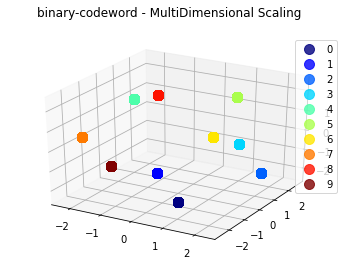

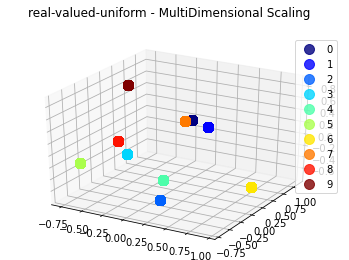

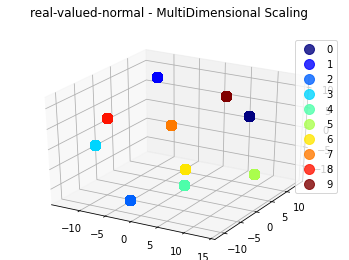

In [6]:
from fna.tools.visualization.plotting import plot_discrete_space

for seq in long_sample_sequence:
    for idx, enc in enumerate(emb):
        stim_seq = enc.draw_stimulus_sequence(seq, as_array=True)
        plot_discrete_space(stim_seq, data_label=enc.label, label_seq=seq, metric='MDS', colormap='jet', display=True, save=False)

We can also quantify the distance between stimulus vectors

[embeddings.py:213 - INFO] Generating stimulus sequence: 10 symbols


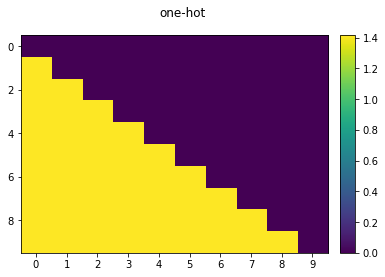

[embeddings.py:213 - INFO] Generating stimulus sequence: 10 symbols


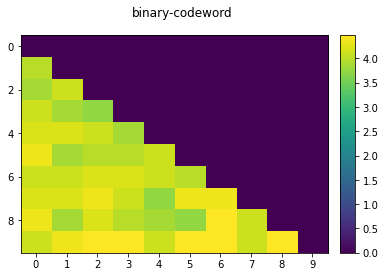

[embeddings.py:213 - INFO] Generating stimulus sequence: 10 symbols


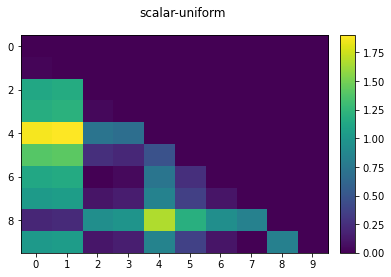

[embeddings.py:213 - INFO] Generating stimulus sequence: 10 symbols


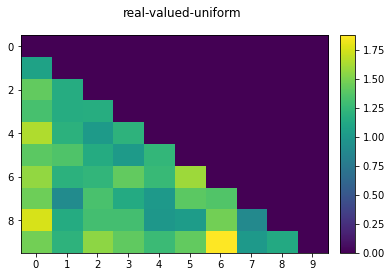

[embeddings.py:213 - INFO] Generating stimulus sequence: 10 symbols


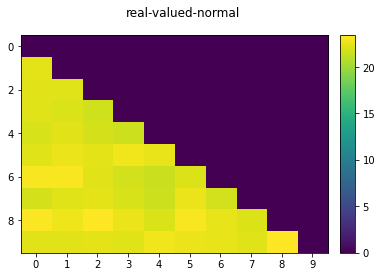

Text(0, 0.5, 'Mean inter-stimulus distance')

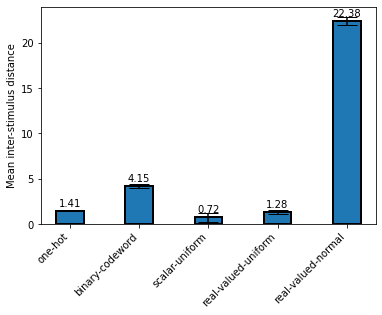

In [7]:
from sklearn import metrics
from fna.tools.visualization.plotting import plot_matrix
from fna.tools.visualization.helper import label_bars
import matplotlib.pyplot as plt

distances = []
for idx, enc in enumerate(emb):
    unique_seq = enc.draw_stimulus_sequence(sequencer.tokens, as_array=True)
    d = np.tril(metrics.pairwise_distances(unique_seq.T))
    plot_matrix(d, labels=sequencer.tokens, data_label=enc.label)
    distances.append((np.mean(d[d!=0]), np.std(d[d!=0])))

fig, ax = plt.subplots()
dist = ax.bar(np.arange(len(emb)), [x[0] for x in distances], width=0.4, edgecolor='k', yerr=[x[1] for x in distances], linewidth = 2, capsize=10)
label_bars(dist, ax)
ax.set_xticks(np.arange(len(emb)))
ax.set_xticklabels([x.label for x in emb], rotation=45, ha="right")
ax.set_ylabel('Mean inter-stimulus distance')

# **4. Continuous symbolic embeddings - tokens to signals** <a id='section4'></a>

## 4.1. `DynamicEmbeddings` - continuous inputs
Refer to any stimulus representation that unfolds in time, i.e. each token is represented by a dynamical process. 

### 4.1.1. Spatiotemporal Spike Patterns (`frozen noise`) <a id='section4.1.1'></a>

In [8]:
# fixed spike pattern
spk_pattern = DynamicEmbeddings(vocabulary=sequencer.tokens).frozen_noise(n_processes=100, pattern_duration=200., rate=10.,
                                                                    resolution=0.1, jitter=None, rng=None)

[embeddings.py:292 - INFO] Populating Stimulus Set: 


[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


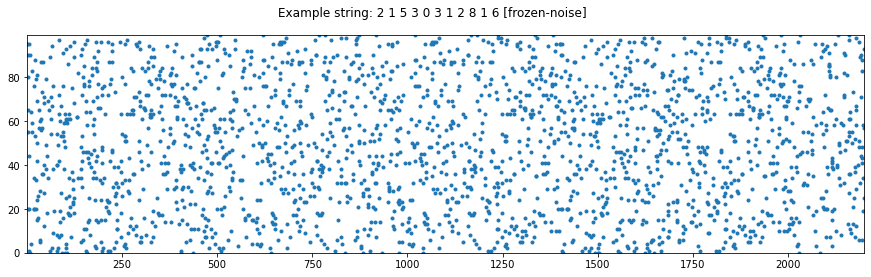

[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


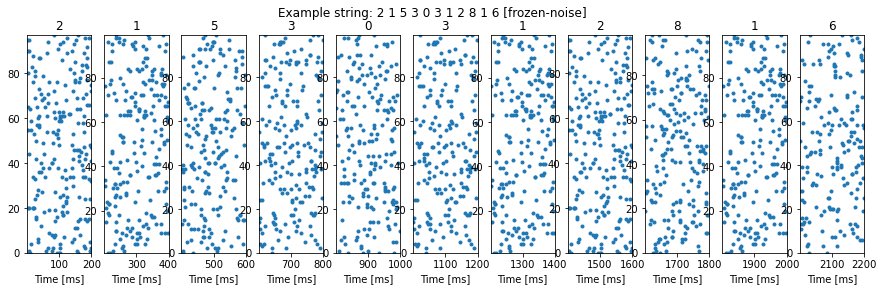

In [9]:
for sseq in sample_sequences:
    spk_pattern.plot_sample(sseq, continuous=True, intervals=None, display=True, save=False)
    spk_pattern.plot_sample(sseq, continuous=False, intervals=None, display=True, save=False)

[embeddings.py:665 - INFO] Generating stimulus sequence: 50 symbols


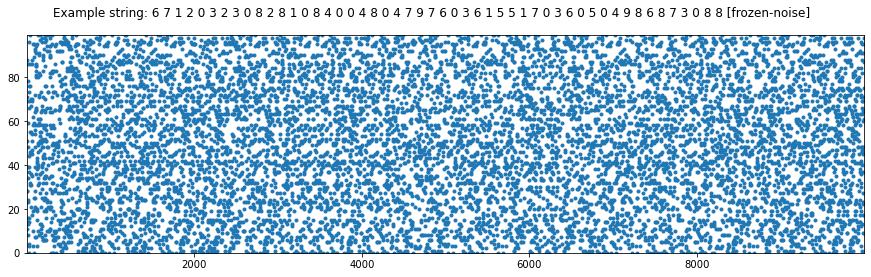

In [10]:
spk_pattern.plot_sample(long_sample_sequence[0][:50], continuous=True, intervals=None, display=True, save=False)

### 4.1.2. Unfolding vector embeddings into continuous signals <a id='section4.1.2'></a>

From any vector or scalar embedding, we can retrieve a continuous embedding by unfolding it in time, i.e. applying a temporal mask to generate a continuous signal, or converting them to a spatiotemporal spike pattern. 

In [11]:
emb = binary_codeword # one_hot #random_vector2 # random_vector1 #scalar #

In the first case, we want to generate a continuous signal. For that purpose, we can apply a variety of different kernels. Below we exemplify some of them. Currently implemented kernels and parameters are:
```python
('box', {}) 
('exp', {'tau': 20.})
('double_exp', {'tau_1': 10., 'tau_2': 100.})
('alpha', {'tau': 100.})
('gauss', {'mu': 0., 'sigma': 1.})
('tri', {})
('sin', {'mean_amplitude': 1., 'frequency': 10., 'phase_shift': 0.})
```

In [12]:
signal_pars = {
    'duration': 150., # single values or rvs
    'amplitude': 10., # single value, list of dim, or rvs
    'kernel': ('alpha', {'tau': 50.}), # {'tau': 150.}),# # (kernel, {kernel_pars})
    'dt': 0.1 # dt
}
sig = emb.unfold(to_signal=True, **signal_pars)

[embeddings.py:366 - INFO] Populating Stimulus Set: 


[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


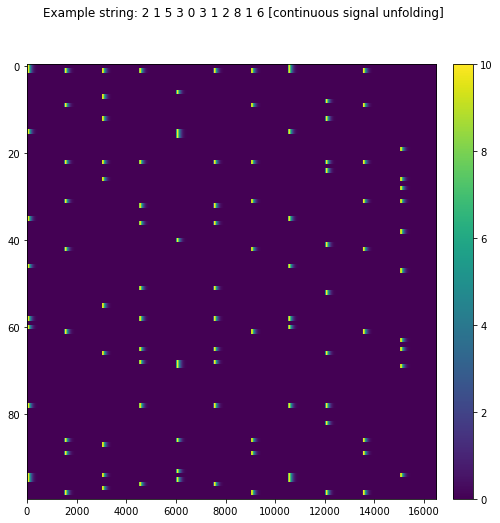

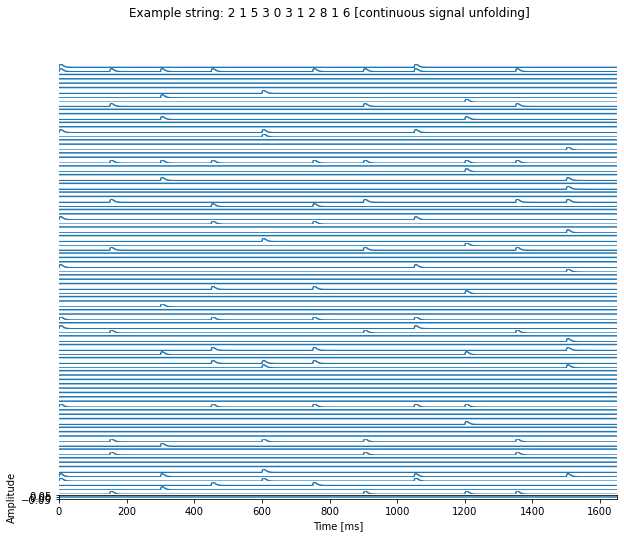

In [13]:
for sseq in sample_sequences:
    sig.plot_sample(sseq, continuous=True, intervals=None, display=True, save=False)

## 4.1.3. Unfolding vector embeddings into spikes 

[embeddings.py:366 - INFO] Populating Stimulus Set: 
[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


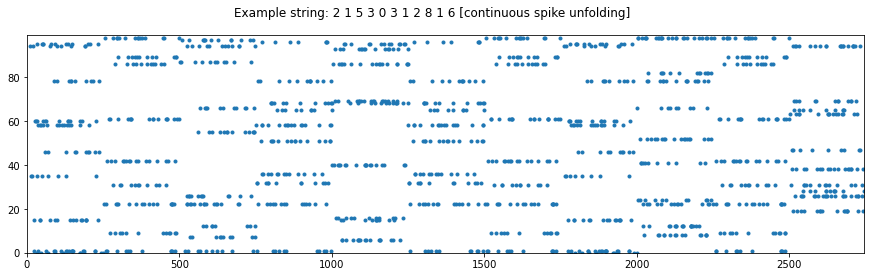

In [14]:
spk_encoding_pars = {
    'duration': 250., #{'dist': np.random.normal, 'params': {'loc': 100., 'scale': 50.}},
    'rate_scale': 50., #{'dist': np.random.normal, 'params': {'loc': 100., 'scale': 50.}},
    'dt': 0.1,
    'shift_range': 100.,
    'jitter': None
}
spk_vec = emb.unfold(to_spikes=True, **spk_encoding_pars)

for sseq in sample_sequences:
    spk_vec.plot_sample(sseq, continuous=True, intervals=None, display=True, save=False)
#   sig.plot_sample(sseq, continuous=False, intervals=None, display=True, save=False)

## 4.1.4. Sequencing dynamic embeddings

The dynamic embeddings can be retrieved either as batches (AnalogSignalList/numpy array or SpikeList) for the entire sequence...

In [15]:
stim_seq, timing_info = sig.draw_stimulus_sequence(sequence[:50], onset_time=0., continuous=True, intervals=None)
print(stim_seq, stim_seq.t_start, stim_seq.t_stop)
stim_seq.as_array()

[embeddings.py:665 - INFO] Generating stimulus sequence: 50 symbols


<tools.signals.analog.AnalogSignalList object at 0x7f96559ce7c0> 0.0 7500.0


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.08668545e-11, 7.93186198e-11, 7.77999295e-11],
       [6.72166027e-16, 5.32891248e-01, 1.04467859e+00, ...,
        8.08668545e-11, 7.93186198e-11, 7.77999295e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.72166027e-16, 5.32891248e-01, 1.04467859e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

 ... or as iterators that yield each token in the sequence one-by-one, along with timing information.

In [16]:
stim_seq2 = sig.draw_stimulus_sequence(sequence[:50], onset_time=0., continuous=False, intervals=None)
print(stim_seq2)
for x in stim_seq2:
    print(x)

[embeddings.py:665 - INFO] Generating stimulus sequence: 50 symbols


(<generator object DynamicEmbeddings._sequence_iterator at 0x7f9656350c80>, None)
<generator object DynamicEmbeddings._sequence_iterator at 0x7f9656350c80>
None


## 4.1.5. Variability in duration, amplitude and ISI

When specifying the unfolding parameters, it may be relevant to introduce variability. The current implementation supports variations in stimulus duration and amplitude. To achieve this, the `amplitude` (or `rate_scale`) and `duration` parameters need to be specified as a dictionary with the following form:
```python
{'dist': np.random.normal, 'params': {'loc': 100., 'scale': 50.}}
```

[embeddings.py:366 - INFO] Populating Stimulus Set: 
[embeddings.py:366 - INFO] Populating Stimulus Set: 
[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


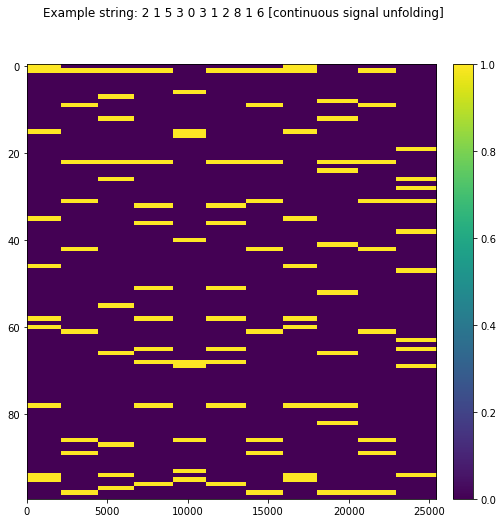

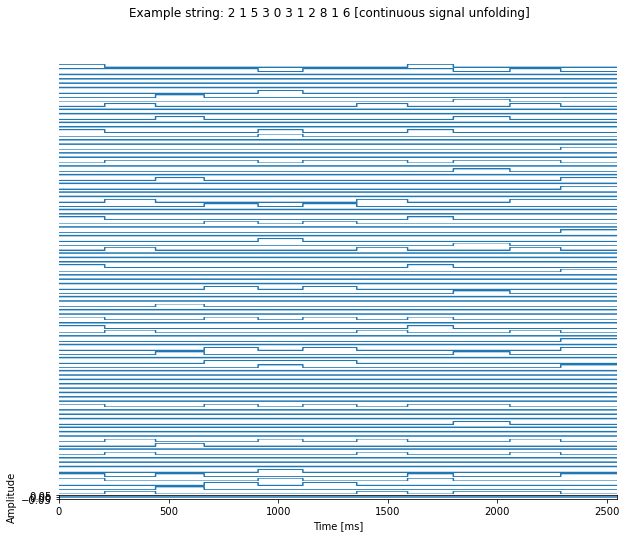

[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


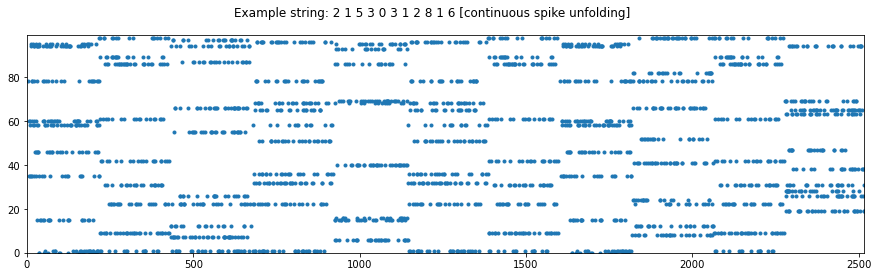

In [17]:
# signal
signal_pars = {
    'duration': {'dist': np.random.normal, 'params': {'loc': 200., 'scale': 50.}},
    'amplitude': 1., 
    'kernel': ('box', {}), 
    'dt': 0.1 # dt
}
sig = emb.unfold(to_signal=True, **signal_pars)

# spikes - will give error if no spikes are emitted for any given stimulus
spk_encoding_pars = {
    'duration': {'dist': np.random.normal, 'params': {'loc': 200., 'scale': 50.}},
    'rate_scale': 100.,
    'dt': 0.1,
    'shift_range': 1.,
    'jitter': None
}
spk_vec = emb.unfold(to_spikes=True, **spk_encoding_pars)

for sseq in sample_sequences:
    sig.plot_sample(sseq, continuous=True, intervals=None, display=True, save=False)
    spk_vec.plot_sample(sseq, continuous=True, intervals=None, display=True, save=False)

[embeddings.py:366 - INFO] Populating Stimulus Set: 
[embeddings.py:366 - INFO] Populating Stimulus Set: 
[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


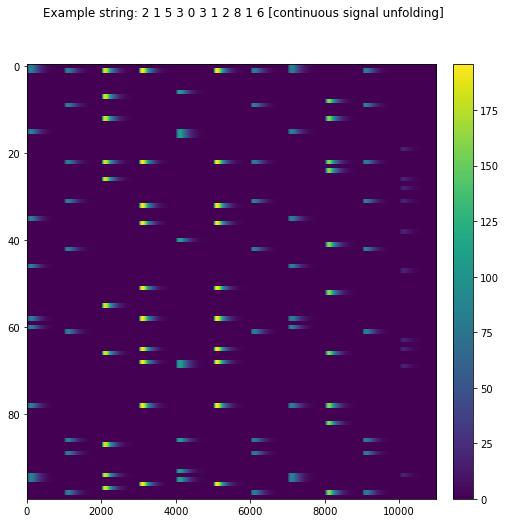

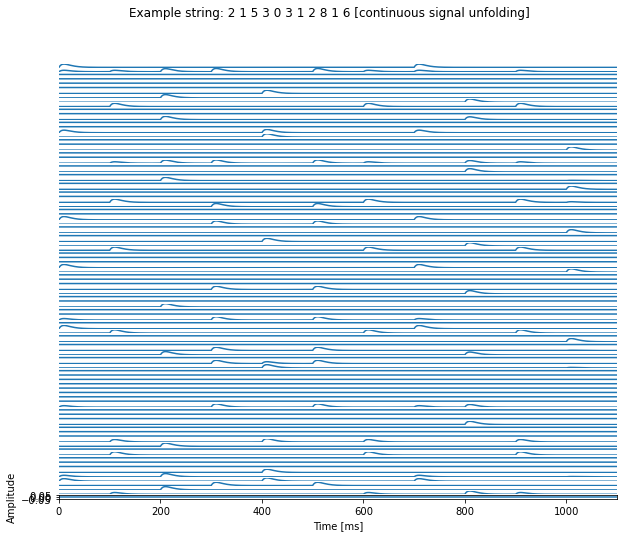

[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


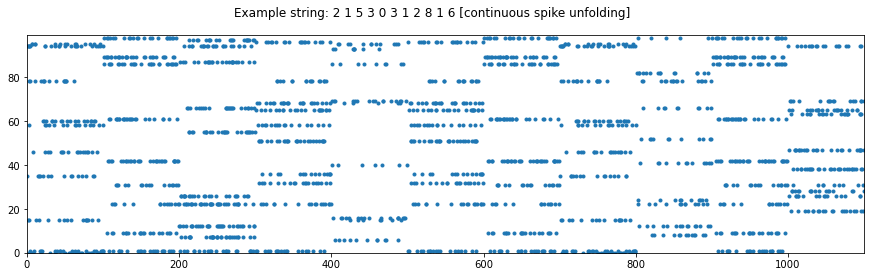

In [18]:
signal_pars = {
    'duration': 100.,
    'amplitude': {'dist': np.random.normal, 'params': {'loc': 100., 'scale': 50.}},
    'kernel': ('alpha', {'tau': 100.}), 
    'dt': 0.1
}
sig = emb.unfold(to_signal=True, **signal_pars)

spk_encoding_pars = {
    'duration': 100.,
    'rate_scale': {'dist': np.random.normal, 'params': {'loc': 200., 'scale': 50.}},
    'dt': 0.1,
    'shift_range': 1.,
    'jitter': None
}
spk_vec = emb.unfold(to_spikes=True, **spk_encoding_pars)

for sseq in sample_sequences:
    sig.plot_sample(sseq, continuous=True, intervals=None, display=True, save=False)
    spk_vec.plot_sample(sseq, continuous=True, intervals=None, display=True, save=False)

Inter-stimulus-intervals can equally be specified as a single value for all ISIs or randomized with values drawn from a random distribution. ISI parameters, however, are specified when the stimulus sequence is generated (`draw_stimulus_sequence`, here called from within `plot_sample`)

[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


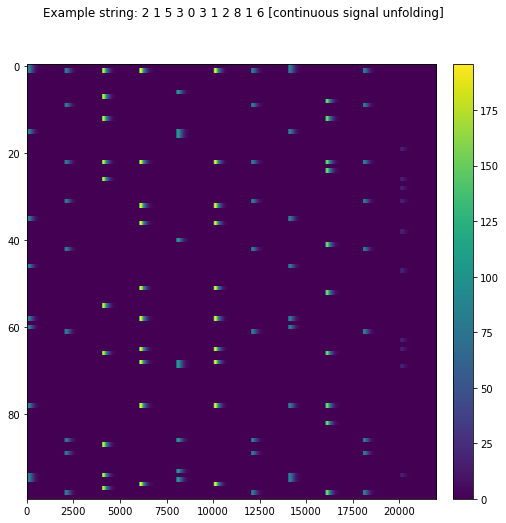

[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


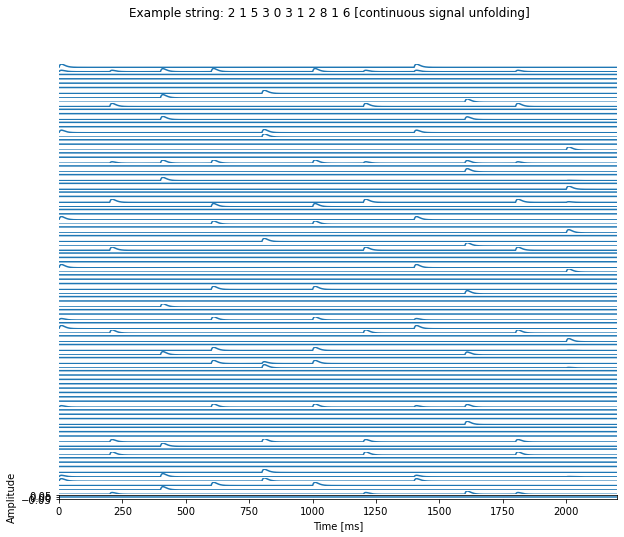

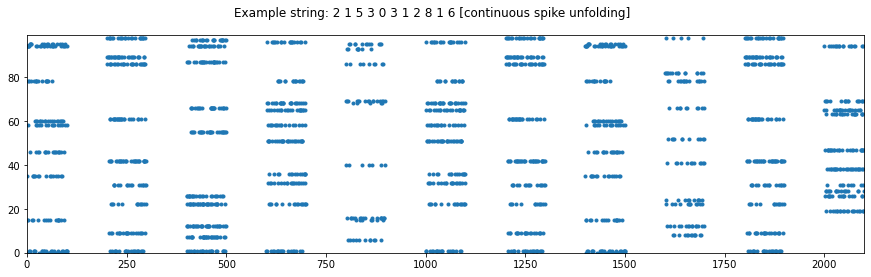

In [19]:
sig.plot_sample(sample_sequences[0], continuous=True, intervals=100.)
spk_vec.plot_sample(sample_sequences[0], continuous=True, intervals=100.)

[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


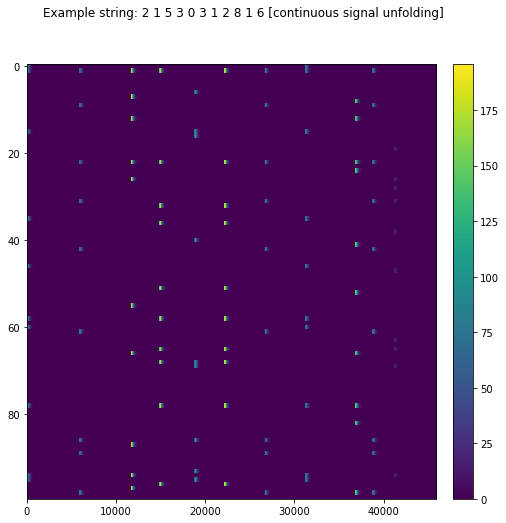

[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


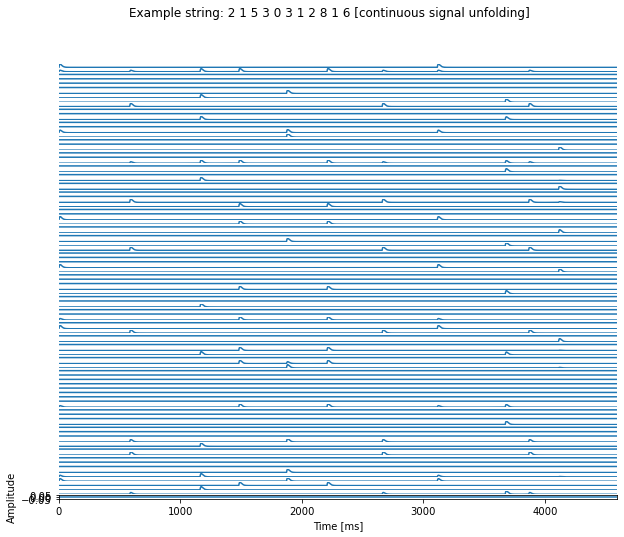

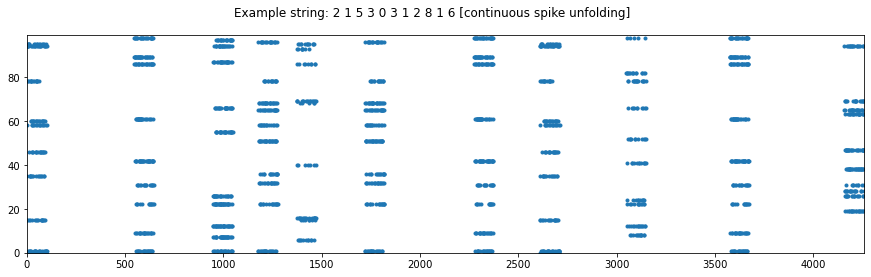

In [20]:
sig.plot_sample(sample_sequences[0], continuous=True, intervals={'dist': np.random.uniform, 'params': {'low': 10., 'high': 500.}})
spk_vec.plot_sample(sample_sequences[0], continuous=True, intervals={'dist': np.random.uniform, 'params': {'low': 10., 'high': 500.}})

## 4.2. Embedding complexity and input trajectories - continuous input spaces

[embeddings.py:665 - INFO] Generating stimulus sequence: 11 symbols


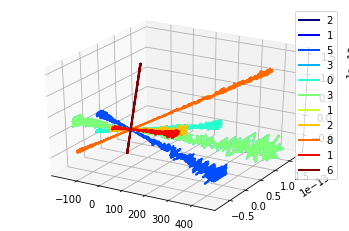

In [21]:
from fna.tools.visualization.helper import get_cmap
from fna.tools.visualization.plotting import plot_trajectory
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D


for sseq in sample_sequences:
    fig = pl.figure()
    ax = fig.add_subplot(111, projection='3d')

    stim_seq, _ = sig.draw_stimulus_sequence(sseq, onset_time=0., continuous=False, intervals=None)

    colors = get_cmap(len(sseq), cmap='jet')
    for idx, (token, embedding) in enumerate(zip(sample_sequences[0], stim_seq)):
        plot_trajectory(embedding[0].as_array(), label=token, color=colors(idx), ax=ax, display=False)
    pl.legend()
    pl.show()

In [22]:
# TODO - analyse continuous input space, distances..


## 5. *Sensory* frontends - processing real-world data <a id='section5'></a>

In [5]:
from fna.tasks.preprocessing import ImageFrontend, AudioFrontend

[utils.py:141 - INFO] NumExpr defaulting to 8 threads.


## 5.1. `ImageFrontend`

In many situations, it may be useful to consider each token in the sequence as an image. 

**Note:** For any given image dataset, the number of tokens that constitute the sequence vocabulary cannot exceed the number of unique labels in the dataset.

[preprocessing.py:95 - INFO] MNIST target directory is not empty! Loading existing data...
[preprocessing.py:60 - INFO] Concatenating dataset (original partition in train+test will be lost): 
	- T=70000
[preprocessing.py:120 - INFO] Concatenating CIFAR-10 dataset: 
	- T=60000
[preprocessing.py:394 - INFO] Generating stimulus sequence: 12 symbols



Sample String: ['6', '5', '0', '9', '2', '1', '2', '7', '9', '0', '8', '6']


[preprocessing.py:394 - INFO] Generating stimulus sequence: 12 symbols


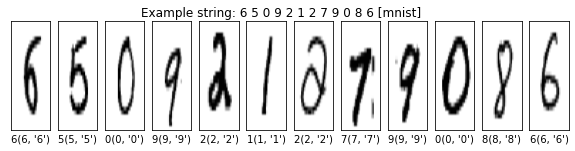

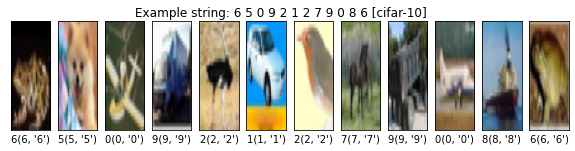

In [6]:
# image data
image_mnist = ImageFrontend(path='../data/mnist/', label='mnist', vocabulary=sequencer.tokens)
image_cifar = ImageFrontend(path='../data/cifar-10/', label='cifar-10', vocabulary=sequencer.tokens)

emb = [image_mnist, image_cifar]
for seq in sample_sequences:
    print("\nSample String: {0!s}".format(seq))
    for idx, enc in enumerate(emb):
        enc.plot_sample(seq)

If the target network requires a discrete input, the stimulus sequence is already given by sequencing the `stimulus_set`... 

[preprocessing.py:394 - INFO] Generating stimulus sequence: 12 symbols


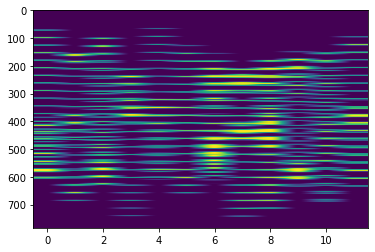

In [7]:
stim_seq = image_mnist.draw_stimulus_sequence(sample_sequences[0], as_array=True)
plt.imshow(stim_seq, aspect='auto')

If the target network operates in continuous time, we can unfold the token representations:
* as signal

[preprocessing.py:394 - INFO] Generating stimulus sequence: 12 symbols



Sample String: ['6', '5', '0', '9', '2', '1', '2', '7', '9', '0', '8', '6']


[preprocessing.py:394 - INFO] Generating stimulus sequence: 12 symbols
[embeddings.py:385 - INFO] Converting sequence to DynamicEmbedding iterator: 
[embeddings.py:668 - INFO] Generating stimulus sequence: 12 symbols


AttributeError: 'NoneType' object has no attribute 't_stop'

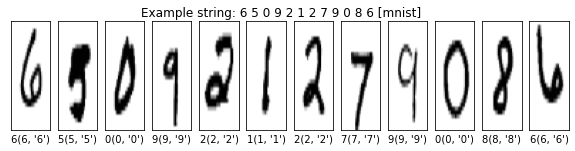

In [18]:
# Unfold vector representations into continuous inputs
signal_pars = {
    'duration': 100., # single values or rvs
    'amplitude': 1., # single value, list of dim, or rvs
    'kernel': ('alpha', {'tau': 200.}), # (kernel_label, {parameters}).. see documentation
    'dt': 0.1 # dt
}
image_mnist.unfold(to_signal=True, **signal_pars)

for seq in sample_sequences:
    print("\nSample String: {0!s}".format(seq))
    for idx, enc in enumerate([image_mnist]):
        enc.plot_sample(seq, continuous=True, display=True, save=False)

* as spikes

[preprocessing.py:394 - INFO] Generating stimulus sequence: 12 symbols



Sample String: ['6', '5', '0', '9', '2', '1', '2', '7', '9', '0', '8', '6']


[preprocessing.py:394 - INFO] Generating stimulus sequence: 12 symbols
[embeddings.py:385 - INFO] Converting sequence to DynamicEmbedding iterator: 
[embeddings.py:668 - INFO] Generating stimulus sequence: 12 symbols
[preprocessing.py:394 - INFO] Generating stimulus sequence: 12 symbols
[preprocessing.py:394 - INFO] Generating stimulus sequence: 12 symbols
[embeddings.py:385 - INFO] Converting sequence to DynamicEmbedding iterator: 
[embeddings.py:668 - INFO] Generating stimulus sequence: 12 symbols


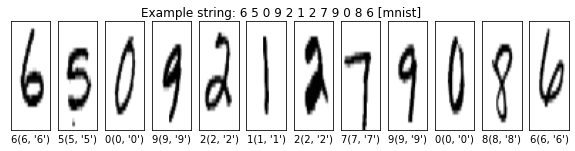

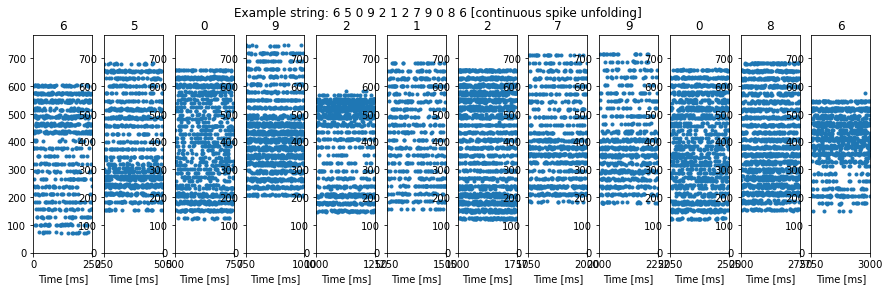

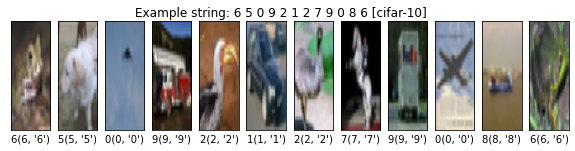

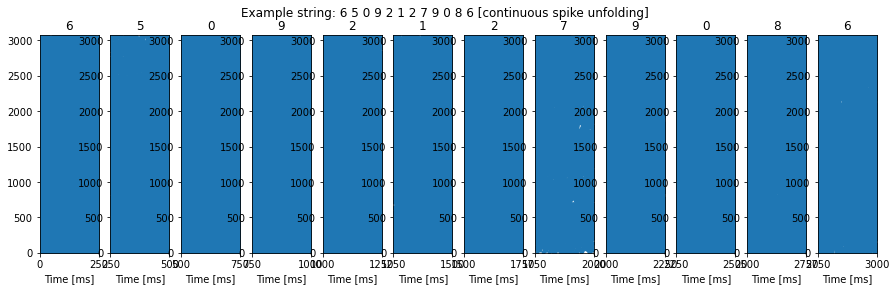

In [14]:
spk_encoding_pars = {
    'duration': 250.,
    'rate_scale': 50.,
    'dt': 0.1,
    'jitter': None
}
image_mnist.unfold(to_spikes=True, **spk_encoding_pars)
image_cifar.unfold(to_spikes=True, **spk_encoding_pars)

for seq in sample_sequences:
    print("\nSample String: {0!s}".format(seq))
    for idx, enc in enumerate([image_mnist, image_cifar]):
        enc.plot_sample(seq, continuous=False, display=True, save=False)

## 5.2. `AudioFrontend`

For simplicity, we will use a pre-processes, pre-generated and established benchmarking dataset, the [Heidelberg spiking datasets](https://compneuro.net/datasets/README.md) (see [[1]](https://arxiv.org/abs/1910.07407)):

* Spiking Heidelberg Digits datset (SHD) - contains the English digits: "zero", "one", "two", "three", "four", "five", "six", "seven", "eight", and "nine", as well as the German ones: "null", "eins", "zwei", "drei", "vier", "fuenf", "sechs", "sieben", "acht", and "neun", each of them repeated about 40 times for each speaker.

* Spiking Speech Commands (SCC) - comprises the twenty core command words, "Yes", "No", "Up", "Down", "Left", "Right", "On", "Off", "Stop", "Go", "Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", and "Nine" with most speakers saying each of them 5 times. There are also 10 auxiliary words, "Bed", "Bird", "Cat", "Dog", "Happy", "House", "Marvin", "Sheila", "Tree", and "Wow", repeated only once for each speaker.

For both datasets, the raw audio files are pre-processed with a 700 channel hydrodynamic basilar membrane model [[2]](https://asa.scitation.org/doi/abs/10.1121/1.2204438?journalCode=jas). The generated movements are converted to spikes by a transmitter pool based hair cell model [[3]](https://asa.scitation.org/doi/10.1121/1.399379). A single layer of Bushy cells is incorporated to increase phase-locking of the generated spikes. 

**References:**

[[1]](https://arxiv.org/abs/1910.07407) - Cramer, B., Stradmann, Y., Schemmel, J., & Zenke, F. (2019). The Heidelberg spiking datasets for the systematic evaluation of spiking neural networks. arXiv:1910.07407

[[2]](https://asa.scitation.org/doi/abs/10.1121/1.2204438?journalCode=jas) - Sieroka, N., Dosch, H. G., & Rupp, A. (2006). Semirealistic models of the cochlea. The Journal of the Acoustical Society of America, 120(1), 297–304. 10.1121/1.2204438

[[3]](https://asa.scitation.org/doi/10.1121/1.399379) - Meddis, R., Hewitt, M. J., & Shackleton, T. M. (1990). Implementation details of a computation model of the inner hair‐cell auditory‐nerve synapse. The Journal of the Acoustical Society of America, 87(4), 1813–1816. 10.1121/1.399379

[preprocessing.py:492 - INFO] Heidelberg digits spiking dataset: 
[preprocessing.py:230 - INFO] Loading SHD dataset...
shd_test.h5: 100%|██████████| 2264/2264 [01:06<00:00, 34.03it/s]
[preprocessing.py:239 - INFO] Concatenating dataset (original partition in train+test will be lost): 
	- T=5090
[embeddings.py:668 - INFO] Generating stimulus sequence: 11 symbols


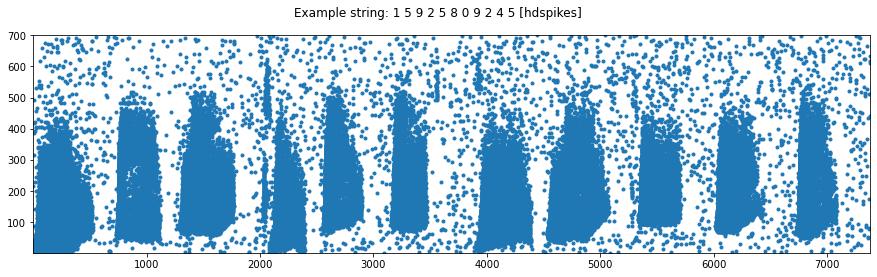

In [20]:
from fna.tasks.preprocessing import AudioFrontend

spoken_digits = AudioFrontend(path='../data/hdspikes/', label='hdspikes', vocabulary=sequencer.tokens, resolution=0.1, language="english")

for seq in sample_sequences:
    spoken_digits.plot_sample(seq, continuous=True, display=True, save=False)

**Note:** This dataset is only suited for spiking networks. If comparisons with ANNs are necessary, the original audio data needs to be processed and the frontend needs to be modified accordingly.

## 5.3. `VideoFrontend`